In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
x.shape, X.shape

((100,), (100, 1))

In [3]:
y = 0.5 * x ** 2 + x + 2 + np.random.normal(size=100)
y.shape

(100,)

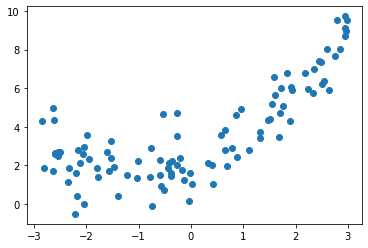

In [4]:
plt.scatter(x, y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
linear = LinearRegression().fit(X, y)

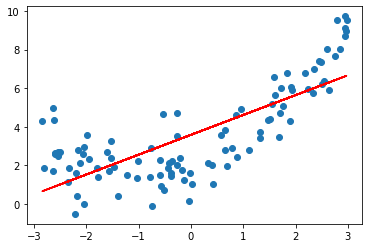

In [7]:
y_predict = linear.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')

In [8]:
(X ** 2).shape

(100, 1)

In [9]:
X2 = np.hstack([X, X ** 2])
X2.shape

(100, 2)

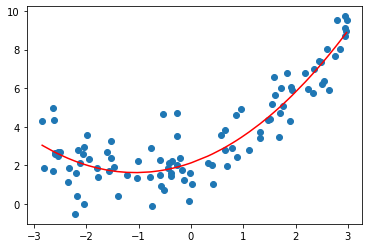

In [10]:
linear2 = LinearRegression().fit(X2, y)
y_predict2 = linear2.predict(X2)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')

## sklearn中的多项式回归

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# degree 最多添加几次幂
poly = PolynomialFeatures(degree=2).fit(X)
X2 = poly.transform(X)

In [13]:
X2.shape

(100, 3)

In [14]:
X2[:5, :]

array([[ 1.        , -2.16892544,  4.70423758],
       [ 1.        , -0.4250504 ,  0.18066784],
       [ 1.        , -2.0400567 ,  4.16183133],
       [ 1.        ,  2.94340535,  8.66363504],
       [ 1.        ,  2.54119666,  6.45768045]])

In [15]:
linear2 = LinearRegression().fit(X2, y)
y_predict2 = linear2.predict(X2)

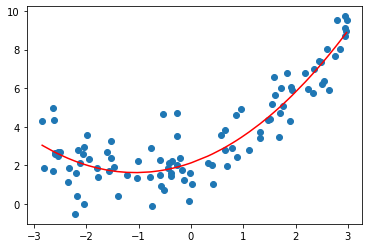

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')

## Pipeline
一次性操作多个方法

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)), # 升维
    ('std_scaler', StandardScaler()), # 归一化
    ('linear', LinearRegression()) # 回归
])

In [19]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

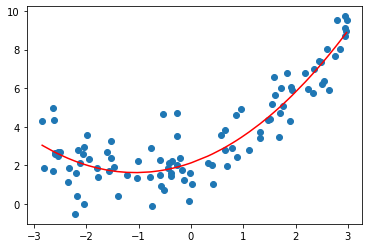

In [20]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')

In [21]:
poly_reg['poly']

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

## 过拟合&欠拟合

## 交叉验证

In [22]:
from sklearn.datasets import load_digits

In [23]:
digits = load_digits()
X = digits.data
y = digits.target

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
best_s, best_k, best_p = 0, 0, 0

for k in range(2, 11):
    for p in range(1, 6):
        knn = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p).fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        if score > best_s:
            best_s, best_k, best_p = score, k, p

best_s, best_k, best_p

(0.9955555555555555, 2, 3)

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
knn = KNeighborsClassifier()
cross_val_score(knn, X_train, y_train)

array([0.98148148, 0.97037037, 0.98513011, 0.98513011, 0.98513011])

In [30]:
best_s, best_k, best_p = 0, 0, 0

for k in range(2, 11):
    for p in range(1, 6):
        knn = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p)
        scores = cross_val_score(knn, X_train, y_train, n_jobs=-1, cv=10)
        score = np.mean(scores)
        if score > best_s:
            best_s, best_k, best_p = score, k, p

best_s, best_k, best_p

(0.985892758430072, 2, 4)

In [31]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=4, p=4).fit(X_train, y_train)

In [32]:
knn.score(X_test, y_test)

0.9933333333333333

## 偏差和方差
![image.png](./imgs/Snipaste_2020-04-04_22-43-46.png)
**方差:**过拟合

**偏差:**欠拟合

**非参数学习:**高方差

**参数学习:**高偏差
![image.png](./imgs/Snipaste_2020-04-04_23-16-11.png)

## 正则化

### L2(Ridge Regression)

In [33]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 2 + np.random.normal(size=100)

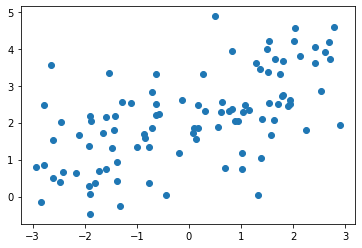

In [34]:
plt.scatter(x, y)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [36]:
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)), # 升维
        ('std_scaler', StandardScaler()), # 归一化
        ('linear', LinearRegression()) # 回归
    ])    

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
poly = PolynomialRegression(degree=20)
poly.fit(X_train, y_train)

predict = poly.predict(X_test)
mean_squared_error(y_test, predict)

58.87943118751705

(-3.0, 3.0, 0.0, 6.0)

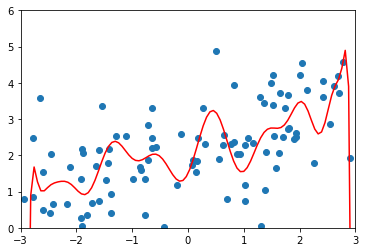

In [41]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0,6])

In [42]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0,6])

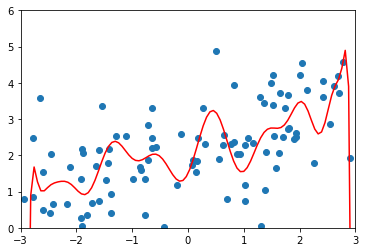

In [43]:
plot_model(poly)

In [44]:
# L1 Regression
from sklearn.linear_model import Ridge

In [45]:
def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)), # 升维
        ('std_scaler', StandardScaler()), # 归一化
        ('ridge', Ridge(alpha=alpha)) # 回归
    ])

In [46]:
ridge1 = RidgeRegression(degree=20, alpha=1e-4)
ridge1.fit(X_train, y_train)
y_predict1 = ridge1.predict(X_test)
mean_squared_error(y_test, y_predict1)

3.046859031506464

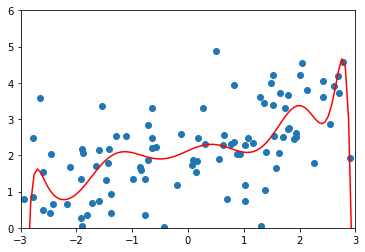

In [47]:
plot_model(ridge1)

In [48]:
ridge2 = RidgeRegression(degree=20, alpha=1)
ridge2.fit(X_train, y_train)
y_predict2 = ridge1.predict(X_test)
mean_squared_error(y_test, y_predict2)

3.046859031506464

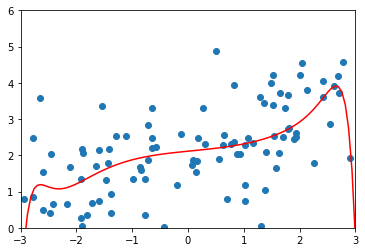

In [49]:
plot_model(ridge2)

In [50]:
ridge3 = RidgeRegression(degree=20, alpha=100)
ridge3.fit(X_train, y_train)
y_predict3 = ridge1.predict(X_test)
mean_squared_error(y_test, y_predict3)

3.046859031506464

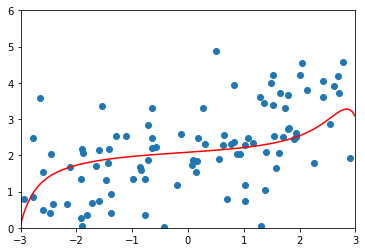

In [51]:
plot_model(ridge3)

### L1(LASSO Regression)

In [52]:
from sklearn.linear_model import Lasso

In [54]:
def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)), # 升维
        ('std_scaler', StandardScaler()), # 归一化
        ('ridge', Lasso(alpha=alpha)) # 回归
    ])

In [61]:
lasso = LassoRegression(degree=20, alpha=0.1)
lasso.fit(X_train, y_train)

y_predict = lasso.predict(X_test)
mean_squared_error(y_test, y_predict)

1.1228727539109884

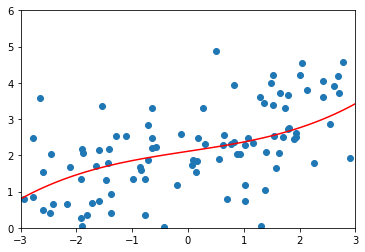

In [62]:
plot_model(lasso)